# TODOS: split by color

In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

plt.style.use('../style.mplstyle')
df = pd.read_csv("../latest.csv")

c:\Users\sevi\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df = fix_data(df, drop_zeros=False)

In [3]:
print("length of df: ", len(df))
print('\n')
df.head(1)

length of df:  106




,StartDate,reading,Duration,Progress,Finished,Q42,Q43,Q1,Q1_7_TEXT,Q2,...,Q16_3,Q16_4,Q16_5,Q16_6,Q16_7,Q16_8,Q16_9,Q17,Q18,Q46
0,2024-08-08 23:30:29,7,118,100,True,Agree,LinkedIn DM,Industry,NaN,2.0,...,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,NaN,NaN,NaN


# Literacy scores

In [4]:
# df['Q4_1']
type(df['Q4_1'])

pandas.core.series.Series

In [5]:
df['Q1']

0      Industry
1      Industry
2      Academic
3      Industry
4      Industry
         ...   
101         NaN
102    Academic
103    Academic
104         NaN
105    Academic
Name: Q1, Length: 106, dtype: object

In [6]:
# df[Q1] is the pandas series of strings of the GROUP (eg. Academic, Industry, etc)

# "alignment problem, scalable oversight, etc" are stored in df['Q4_1'], df['Q4_2'], etc
safety_columns = ['Q4_1', 'Q4_2', 'Q4_3', 'Q4_4']

# "machine learning algorithms, logistic regression, etc" are stored in df['Q3_1'], df['Q3_2'], etc
ml_columns = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4']


# df[Q4_1] is a pandas series of strings, use this to convert to quantitave data if you need
literacy_map = {
    'Never heard of it': 0,
    'Heard of it': 1,
    'Know a little': 2,
    'Know a fair amount': 3,
    'Know it well': 4
}

ml_concepts = [
    "Machine learning algorithms",
    "Logistic Regression",
    "Empirical Risk Minimization",
    "Markov random fields"
]

ai_safety_concepts = [
    "The \"AI alignment problem\"",
    "Scalable Oversight",
    "Instrumental convergence",
    "Coherent extrapolated volition"
]


In [7]:
# drop everything where Q1 is nan
df = df.dropna(subset=['Q1'])

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set the style to use serif font
# plt.style.use('seaborn')

# Function to compute the mean literacy for each group and concept
def compute_mean_literacy(df, columns, group):
    return df[df['Q1'] == group][columns].replace(literacy_map).mean()

# Combine ML and AI Safety columns
all_columns = ml_columns + safety_columns
all_concepts = ml_concepts + ai_safety_concepts

# Compute mean literacy for each group
groups = df['Q1'].unique()
group_data = {group: compute_mean_literacy(df, all_columns, group) for group in groups}


# Radar chart of literacy scores

In [9]:

# # Set up the radar chart


num_vars = len(all_concepts)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle



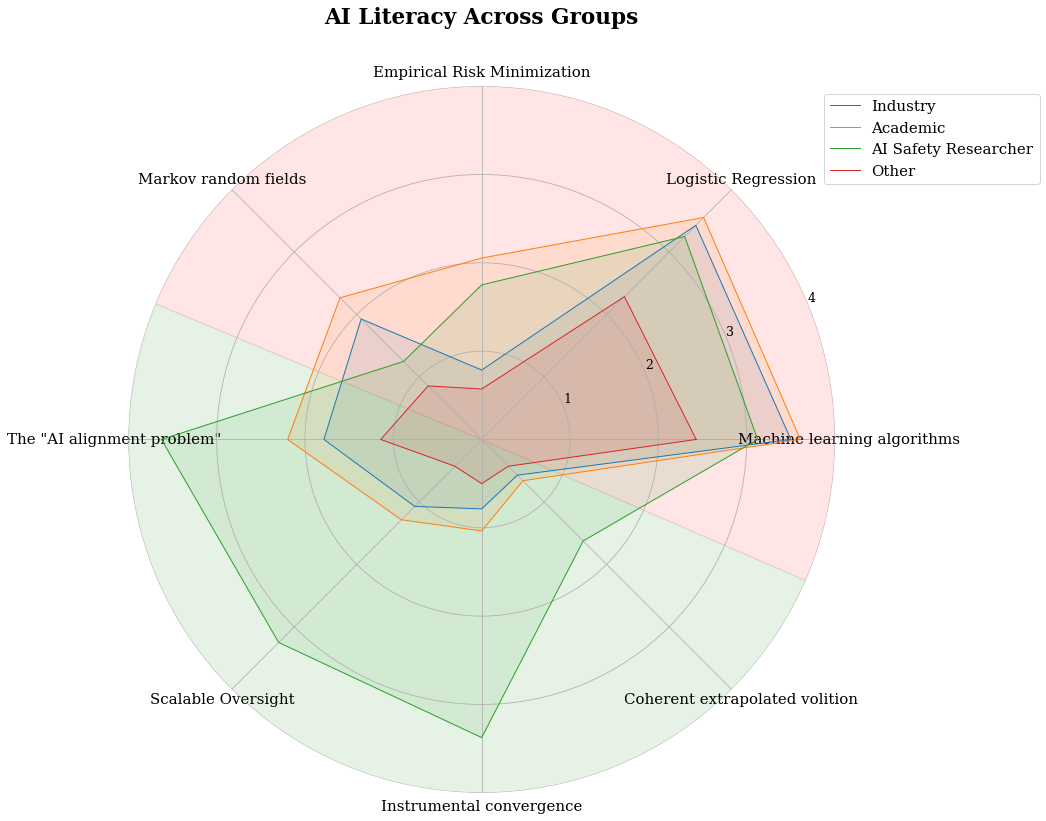

In [10]:

fig, ax = plt.subplots(figsize=(16, 13), subplot_kw=dict(projection='polar'))

# red_start = 7 * np.pi / 8
# red_end = 15 * np.pi / 8
# green_start = 15 * np.pi / 8
# green_end = 7 * np.pi / 8  # This is equivalent to 7pi/8 in the next cycle

# ACTUALLY THE GREEN
red_start = 2.72
red_end = 15 * np.pi / 8

# ACTUALLY THE RED ZONE
green_start = 5.87
green_end = 7 * np.pi / 8  # This is equivalent to 7pi/8 in the next cycle

continuous_angles = np.linspace(0, 2*np.pi, 200)

# Fill red zone
ax.fill_between(continuous_angles, 0, 4, 
                where=((red_start <= continuous_angles) & (continuous_angles <= red_end)),
                color='green', alpha=0.1)

# Fill green zone
ax.fill_between(continuous_angles, 0, 4, 
                where=((green_start <= continuous_angles) | (continuous_angles <= green_end)),
                color='red', alpha=0.1)

# ax.fill_between(empirical_angles, [4] * len(empirical_angles), color='red', alpha=0.05)
# ax.fill_between(theoretical_angles, [4] * len(theoretical_angles), color='green', alpha=0.05)

for group, data in group_data.items():
    values = data.values.flatten().tolist()
    values += values[:1]  # Complete the polygon
    ax.plot(angles, values, linewidth=1, label=group)
    ax.fill(angles, values, alpha=0.1)

# Set chart properties
ax.set_xticks(angles[:-1])
ax.set_xticklabels(all_concepts, fontsize='small')
ax.set_ylim(0, 4)
ax.set_yticks([1, 2, 3, 4])
ax.set_yticklabels(['1', '2', '3', '4'], fontsize='x-small')
ax.spines['polar'].set_visible(False)

# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), fontsize='small')

# Set title
plt.title('AI Literacy Across Groups', fontsize='large', fontweight='bold', y=1.08)

# Adjust layout and save
# plt.tight_layout()
plt.savefig('figs/ai_literacy_radar.pdf', format='pdf', dpi=300, bbox_inches='tight')
# plt.close()
plt.show()

# SHIT